In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from pre_processing import *
from utility import *

class Segmentation:

    def __init__(self, binary_img, debug=False):
        self.debug = debug
        self.binary_image = binary_img

        boxes_contour = self.contours_Box(self.binary_image)
        boxes = self.segment_box(self.binary_image, boxes_contour)
        id_boxes_img, self.score_box_img = self.split_score_id_box(boxes)
        
        id_boxes_contour = self.contours_IdNumber(id_boxes_img)
        self.id_box_list = self.segment_box(id_boxes_img, id_boxes_contour, 20)
        
    def contours_Box(self, bi_img):
        contours, _ = cv2.findContours(bi_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        if(self.debug):
            print("contours box")
        
        return contours
    
    def contours_IdNumber(self, bi_img):
        contours, _ = cv2.findContours(bi_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        if(self.debug):
            print("contours id number")

        return contours

    def segment_box(self, bi_img, contours, c_size=0):
        c_list = []
        for cnt in contours:
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)

            if(len(approx) == 4):
                x, y, w, h = cv2.boundingRect(approx)
                box = bi_img[y:y+h, x:x+w]

                if(w > 150):
                    c_list.append(box)
                    
                    if(self.debug):
                        showImage(box)
        
        return c_list

    def split_score_id_box(self, boxlist):

        id_box = boxlist[0]
        score_box = boxlist[1]
        for box in boxlist:
            if(box.shape[1] > id_box.shape[1]):
                score_box = id_box
                id_box = box

        if(self.debug):
            showImage(id_box, 'id box')
            showImage(score_box, 'score box')
        
        return id_box, score_box
    
        

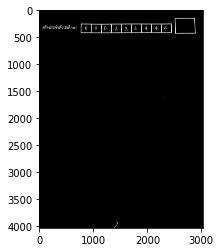

contours box


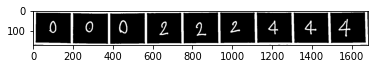

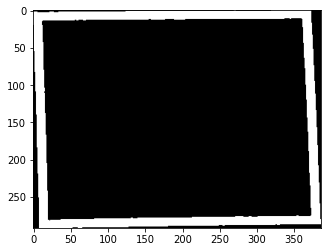

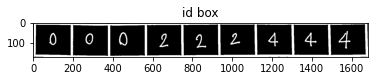

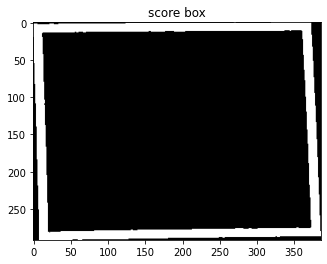

contours id number


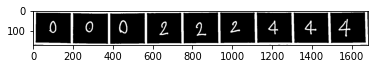

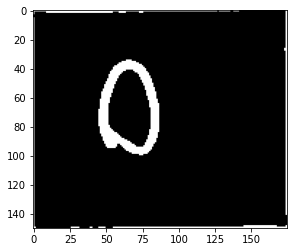

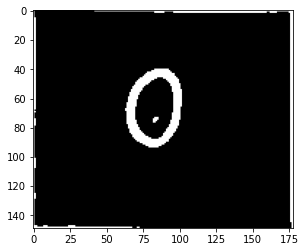

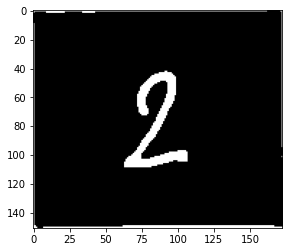

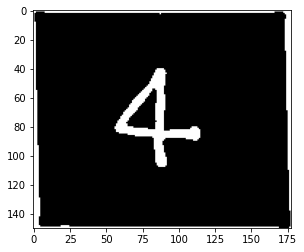

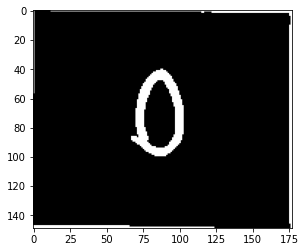

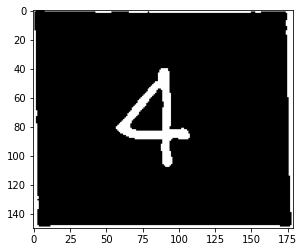

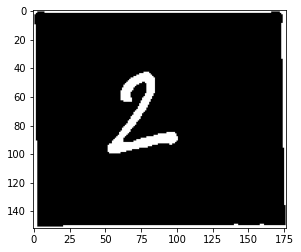

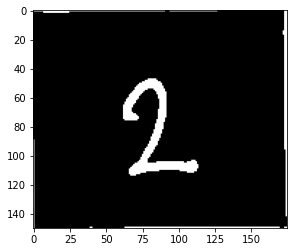

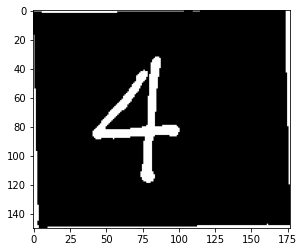

In [51]:
img = cv2.imread('image_test/test6.JPG')
bi_img = Pre_Processing(img).binary_image
showImage(bi_img)
Segmentation(bi_img,True)


